<p style="font-size:11px;"><em><strong>Créditos</strong>: El contenido de este cuaderno ha sido tomado de varias fuentes, pero especialmente de <a href="http://darribas.org/">Dani Arribas-Bel</a> - University of Liverpool & <a href="http://spatial.ucr.edu/peopleRey.html">Sergio Rey</a> - Center for Geospatial Sciences, University of California, Riverside. El compilador se disculpa por cualquier omisión involuntaria y estaría encantado de agregar un reconocimiento.</em></p>

# Modelos de Regresión para Dependencia Espacial SAR

## Dependencia espacial

Como acabamos de discutir, la heterogeneidad espacial se trata de efectos de fenómenos que están **explícitamente vinculados**
a la geografía y que, por lo tanto, causan variación espacial y agrupamiento. Esto
abarca muchos de los tipos de efectos espaciales en los que podemos estar interesados cuando ajustamos
regresiones lineales. Sin embargo, en otros casos, nuestro enfoque está en el efecto de la **configuración espacial**
de las observaciones, y en qué medida eso afecta al resultado que estamos considerando. Por ejemplo, podríamos pensar que el precio de una casa no
solo depende de si es un adosado o un apartamento, sino también de si está rodeada de muchos más adosados que rascacielos con más
apartamentos. Esto, podríamos hipotetizar, podría estar relacionado con la diferente "apariencia" que tiene un
vecindario con edificios históricos de baja altura en comparación con uno con
rascacielos modernos. En la medida en que estas dos configuraciones espaciales diferentes
entren de manera diferente en el proceso de determinación del precio de la casa, estaremos
interesados en capturar no solo las características de una casa, sino también de
las que la rodean.
Este tipo de efecto espacial es fundamentalmente diferente
de la heterogeneidad espacial en que no está relacionado con características inherentes de la geografía sino que se relaciona
con las características de las observaciones en nuestro conjunto de datos y, especialmente, con su disposición espacial. Llamamos a este fenómeno por el cual los valores de las observaciones están relacionados
entre sí a través de la distancia **dependencia espacial**.

Para incorporar la dependencia espacial en los modelos, se puede utilizar los llamados Modelos Autoregresivos Simultáneos (\cite{whittle1954stationary}), los cuales permiten modelar la dependencia espacial a través de la inclusión de una matriz de vecindad. Esta matriz define la estructura de los vecinos de cada unidad de mapeo, ya sea en función de la distancia entre unidades o a partir de relaciones de contigüidad (\cite{anselin1996simple, elhorst2014spatial}).

Los modelos SAR son ampliamente utilizados en econometría y geografía, así como en otros campos que requieren un análisis espacial riguroso, como la epidemiología y la planificación urbana (\cite{elhorst2022dynamic, rey2023geographic, jaya2021spatial, ver2018spatial}). Sin embargo, la aplicación de algunos de estos modelos requiere de técnicas especiales, ya que la estructura de dependencia espacial puede introducir complicaciones que no están presentes en los modelos estadísticos clásicos (\cite{anselin1990spatial}).

Los modelos de autoregresión espacial son un tipo de modelo estadístico utilizado para capturar y modelar la dependencia espacial entre unidades de análisis geográficas (\cite{whittle1954stationary, getis2009spatial, stakhovych2009specification, ripley1988statistical}). En lugar de asumir que las observaciones son independientes entre sí, estos modelos reconocen que las unidades cercanas en el espacio tienden a presentar valores similares (\cite{anselin1988spatial}). 

La aplicabilidad de los modelos de autoregresión espacial en los estudios de susceptibilidad a movimientos en masa radica en la naturaleza inherentemente espacial de estos fenómenos. Los movimientos en masa tienden a estar influenciados por las condiciones de las áreas adyacentes, como el relieve del terreno, condiciones climáticas, la cobertura del suelo y las características geológicas (\cite{samia2019dynamic}). Estos modelos son ampliamente utilizados en análisis espaciales debido a su capacidad para incluir explícitamente la estructura de dependencia entre las unidades vecinas a través de matrices de vecindad (\cite{lesage2011pitfalls, kelejian2007relative}). Esta matriz introduce el componente espacial, permitiendo que el valor de la variable respuesta en cada unidad de análisis se vea influido por los valores de las unidades vecinas. Esto permite modelar explícitamente el efecto que tienen los vecinos en la variable de interés.

Sin embargo, los modelos de autoregresión espacial también presentan algunas limitaciones (\cite{lesage2011pitfalls, anselin2022spatial}). La estimación de los parámetros en los modelos de autoregresión espacial puede ser compleja, especialmente cuando se trabaja con grandes conjuntos de datos y matrices de vecindad densas. Adicionalmente, la definición de la matriz de vecindad es fundamental, y una elección incorrecta puede llevar a resultados sesgados o poco representativos.

Las matrices de vecindad son una pieza clave en los modelos de autoregresión espacial (\cite{earnest2007evaluating}). Una matriz de vecindad define qué unidades se consideran "vecinas" y cómo se relacionan entre sí. Cada elemento de la matriz representa la fuerza o presencia de una relación espacial entre dos unidades. Existen diferentes tipos de matrices de vecindad (\cite{earnest2007evaluating, getis2009spatial, stakhovych2009specification}):

1. \textbf{Matriz de Vecindad Basada en la Contigüidad}: Este tipo de matriz define como vecinos a aquellas unidades que comparten un límite común. Es ideal para el análisis en zonas divididas en celdas regulares o regiones administrativas.

2. \textbf{Matriz de Vecindad Basada en Distancia}: En este tipo de matriz, se consideran vecinos aquellas unidades que se encuentran dentro de un radio específico de distancia. La vecindad se define en términos de la cercanía física.

3. \textbf{Matriz de Vecindad K-Vecinos más Cercanos}: Esta matriz define como vecinos a un número fijo de las unidades más cercanas a cada unidad de análisis. Asegura que cada unidad tenga el mismo número de vecinos, lo cual puede ser útil para evitar problemas de unidades aisladas sin vecinos.

La ecuación básica de un modelo de autoregresión simultaneo se puede representar de la siguiente manera (\cite{cliff1981spatial, kelejian2007relative, lesage2009introduction}):

\begin{equation}
Y = \rho W Y + X \beta + \epsilon
\end{equation}

donde el término $\rho$ introduce el componente espacial, permitiendo que el valor de la variable respuesta \textbf{Y} en cada unidad de análisis esté influido por los valores de las unidades vecinas, ponderados por la matriz de vecindad (W). \textbf{$\beta$} es el vector de coeficientes de regresión asociados a las variables predictoras (X). Estos coeficientes reflejan la influencia de cada variable en la variable respuesta \textbf{Y}. \textbf{($\epsilon$)} es el término de error aleatorio distribuido de manera independiente e idéntica con media cero, que recoge la variabilidad no explicada por el modelo. 

En los modelos de autoregresión simultaneo (SAR) de forma estricta la dependencia espacial está asociada a la variable respuesta $Y$, lo que implica una relación simultánea que involucra todas las observaciones. Esto requiere una operación como la inversa de $(1-\rho W)$ para despejar los valores de $Y$. Sin embargo, la mayoría de los autores amplían este grupo a modelos espaciales con tres tipos de efectos de dependencia: (i) autocorrelación endógena en la variable respuesta (SAR), (ii) autocorrelación exógena en los predictores y (iii) autocorrelación en los términos de error. El modelo espacial general (GNS, por sus siglas en inglés), también conocido como modelo espacial SARAR(1,1) o modelo espacial de Cliff-Ord, abarca estos tres tipos de dependencias de la siguiente forma (\cite{lesage2009introduction, kelejian2007relative, cliff1981spatial}):

\begin{equation} \label{eq:2} y = \textbf{X} \beta + \textbf{W} \textbf{X} y + \rho \textbf{W} y + \lambda \textbf{W} \mu + \epsilon \end{equation}

\par donde $\lambda$ es el coeficiente en una estructura autoregresiva espacial para el error $\mu$. Es decir, que el término $W_y$ captura los efectos de interacción endógena entre la variable respuesta,  $WX_y$ modela los efectos de interacción exógena entre los predictores; mientras que el término $W_u$ se ocupa de los efectos de interacción entre los residuales.

\par De acuerdo como se incluyan o eliminen los términos se pueden obtener diferentes especificaciones (\cite{elhorst2013spatial}). La más común es el modelo con Autoregresión Espacial (SAR), donde $\lambda=0$, y por lo tanto solo incluye la variable dependiente con autoregresión espacial, $\rho \textbf{W}y$. En el caso donde $\rho=0$, el modelo de Error Espacial (SEM) retiene los términos de error $\lambda \textbf{W} \mu$, mientras que el modelo con Autoregresión Espacial en X (SLX) comprende la autoregresión espacial de los predictores, $\textbf{W} \textbf{X} y$. Otras variantes corresponden al modelo Combinado Autoregresivo de Kelejan-Prucha (SAC), que incluye autocorrelación en $\rho \textbf{W} y$ y $\lambda \textbf{W} \mu$; el modelo de Durbin Espacial (SDM), que combina una variable dependiente autoregresiva $\rho \textbf{W} y$ y predictores con autoregresión espacial $\textbf{W} \textbf{X} y$; y el modelo de Error de Durbin Espacial (SDEM), que incluye un término de error espacial $\lambda \textbf{W} \mu$ combinado con predictores con autoregresión espacial $\textbf{W} \textbf{X} y$ (\cite{elhorst2022dynamic, anselin2022spatial}).

<center><img src="https://i.pinimg.com/736x/cb/2a/95/cb2a952590ecbd070d230e82c7bbd107.jpg" width="800"></center>

Un primer paso esencial en el uso de modelos espaciales es estimar cualquier posible estructura espacial en los datos de entrada o en el residuo de los modelos. Dos pruebas comunes para detectar efectos espaciales son el gráfico de dispersión de Moran (\cite{anselin1988spatial}) y la prueba del Multiplicador de Lagrange (LM) (\cite{anselin1996simple}). El gráfico de dispersión de Moran ilustra la relación entre cada observación y el promedio de sus vecinos, y ayuda a identificar conglomerados locales y valores atípicos espaciales. El gráfico categoriza las asociaciones espaciales en cuatro tipos: valores altos rodeados de vecinos con valores altos (Q1), valores bajos rodeados de valores bajos (Q3), Bajo-Alto (Q2) y Alto-Bajo (Q3), que indican conglomerados o valores atípicos relativos a la media general. El estadístico $I$ de Moran es la pendiente de un ajuste lineal al gráfico de dispersión, y mide la dependencia espacial general:

\begin{equation} \label{eq:1} MI = n \frac{\sum_{i=1}^n \sum_{j=1}^n w_{ij} (y_i-\bar{y}) (y_j-\bar{y})} {\sum_{i=1}^n \sum_{j=1}^n w_{ij} \sum_{i=1}^n (y_i-\bar{y})^2} \end{equation}

donde $n$ es el número de observaciones, $y_i$ es el valor estandarizado de la variable respuesta en la ubicación $i$. El Índice de Moran (MI)  varía de $-$1 a $+$1, donde cero indica ausencia de autocorrelación espacial, +1 indica una agrupación perfecta de valores similares, y -1 indica dispersión.

\par La prueba del Multiplicador de Lagrange (LM) se utiliza para decidir sobre un modelo de regresión espacial adecuado y evaluar la autocorrelación espacial tanto en la variable respuesta como en sus residuales (\cite{anselin1988spatial}). La prueba LM compara modelos restringidos (mínimos cuadrados ordinarios sin términos espaciales) con modelos no restringidos (que incluyen términos espaciales). El término espacial puede ser una variable dependiente autoregresiva espacialmente o un término de error autoregresivo espacialmente. El estadístico LM se calcula como la diferencia entre los logaritmos de verosimilitud de los modelos restringido y no restringido, siguiendo una distribución $\chi^2$ con un grado de libertad bajo la hipótesis nula de no dependencia espacial. Si el estadístico de la prueba excede el valor crítico, se rechaza la hipótesis nula de independencia espacial.

## Efectos de autocorrelación exógena entre las variables predictoras

Volviendo al ejemplo del precio de las casas con el que hemos estado trabajando. Hasta ahora, hemos hipotetizado que el precio de una casa alquilada en San Diego a través de AirBnb puede ser explicado utilizando información sobre sus propias características así como algunas relacionadas con su ubicación, como el vecindario o la distancia al parque principal de la ciudad. Sin embargo, también es razonable pensar que los posibles inquilinos se preocupan por el área más grande alrededor de una casa, no solo por la casa en sí, y estarían dispuestos a pagar más por una casa que esté rodeada de ciertos tipos de casas, y menos si está ubicada en medio de otros tipos. ¿Cómo podríamos probar esta idea?

La forma más directa de introducir dependencia espacial en una regresión es considerando no solo una variable explicativa dada, sino también su rezago espacial. En nuestro caso de ejemplo, además de incluir un indicador para el tipo de casa, también podemos incluir el rezago espacial de cada tipo de casa. Esta adición implica que también estamos incluyendo como factor explicativo del precio de una casa dado la proporción de casas vecinas de cada tipo. Matemáticamente, esto implica estimar el siguiente modelo:

$$
\log(P_i) = \alpha + \sum^{p}_{k=1}X_{ij}\beta_j + \sum^{p}_{k=1}\left(\sum^{N}_{j=1}w_{ij}x_{jk}\right)\gamma_k + \epsilon_i
$$

donde $\sum_{j=1}^N w_{ij}x_{jk}$ representa el rezago espacial de la $k$-ésima variable explicativa. Esto se puede expresar en *forma matricial* utilizando la matriz de pesos espaciales, $\mathbf{W}$, como:
$$
\log(P_i) = \alpha + \mathbf{X}\beta + \mathbf{WX}\gamma + \epsilon
$$

Esto divide el modelo para enfocarse en dos efectos principales: $\beta$ y $\gamma$. El efecto $\beta$ describe el cambio en $y_i$ cuando $X_{ik}$ cambia en uno. Dado que usamos el precio logarítmico para una variable $y$, nuestros coeficientes $\beta$ aún se interpretan como *elasticidades*, lo que significa que un cambio de unidad en la variable $x_i$ resulta en un cambio porcentual $\beta$ en el precio *y_i*. El subíndice para el sitio $i$ es importante aquí: dado que estamos tratando con una matriz $\mathbf{W}$, es útil ser claro sobre dónde ocurre el cambio. 

De hecho, esto es importante para el efecto $\gamma$, que representa un efecto *indirecto* de un cambio en $X_i$. Esto se puede conceptualizar de dos maneras. Primero, se podría pensar en $\gamma$ simplemente como *el efecto de un cambio de unidad en sus alrededores promedio.* Esto es útil y simple. Pero, esta interpretación ignora dónde puede ocurrir este cambio. En realidad, un cambio en una variable en el sitio $i$ resultará en un *derrame* a sus alrededores: cuando $x_i$ cambia, también cambia el *rezago espacial* de cualquier sitio cerca de $i$. La precisión de esto dependerá de la estructura de $\mathbf{W}$, y puede ser diferente para cada sitio. Por ejemplo, piense en un sitio "focal" muy conectado en una matriz de pesos estandarizada por filas. Este sitio focal no se verá muy afectado si un vecino cambia por una unidad, ya que cada sitio solo contribuye en pequeña medida al rezago en el sitio focal. Alternativamente, considere un sitio con solo un vecino: su rezago cambiará *exactamente* en la cantidad que cambie su único vecino. Por lo tanto, para descubrir el efecto indirecto exacto de un cambio $y$ causado por el cambio en un sitio específico $x_i$, debería calcular el *cambio en el rezago espacial*, y luego usar eso como su *cambio* en $X$. 

En Python, podemos calcular el rezago espacial de cada variable cuyo nombre comience por `pg_` primero creando una lista con todos esos nombres, y luego aplicando `lag_spatial` de `PyS.

In [2]:
%matplotlib inline

from pysal.model import spreg
from pysal.lib import weights
from pysal.explore import esda
from scipy import stats
import statsmodels.formula.api as sm
import numpy
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sbn

In [3]:
db = gpd.read_file('https://geographicdata.science/book/_downloads/dcd429d1761a2d0efdbc4532e141ba14/regression_db.geojson')
db.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 6110 entries, 0 to 6109
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   accommodates        6110 non-null   int64   
 1   bathrooms           6110 non-null   float64 
 2   bedrooms            6110 non-null   float64 
 3   beds                6110 non-null   float64 
 4   neighborhood        6110 non-null   object  
 5   pool                6110 non-null   int64   
 6   d2balboa            6110 non-null   float64 
 7   coastal             6110 non-null   int64   
 8   price               6110 non-null   float64 
 9   log_price           6110 non-null   float64 
 10  id                  6110 non-null   int64   
 11  pg_Apartment        6110 non-null   int64   
 12  pg_Condominium      6110 non-null   int64   
 13  pg_House            6110 non-null   int64   
 14  pg_Other            6110 non-null   int64   
 15  pg_Townhouse        6110 non-n

<Axes: >

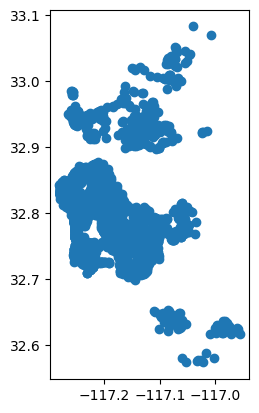

In [4]:
db.plot()

In [5]:
db.head(2)

,accommodates,bathrooms,bedrooms,beds,neighborhood,pool,d2balboa,coastal,price,log_price,id,pg_Apartment,pg_Condominium,pg_House,pg_Other,pg_Townhouse,rt_Entire_home/apt,rt_Private_room,rt_Shared_room,geometry
0,5,2.0,2.0,2.0,North Hills,0,2.972077,0,425.0,6.052089,6,0,0,1,0,0,1,0,0,POINT (-117.12971 32.75399)
1,6,1.0,2.0,4.0,Mission Bay,0,11.501385,1,205.0,5.323010,5570,0,1,0,0,0,1,0,0,POINT (-117.25253 32.78421)


Estas son las variables explicativas que utilizaremos a lo largo de este ejemplo.


In [6]:
variable_names = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'rt_Private_room', 'rt_Shared_room', 'pg_Condominium', 'pg_House', 'pg_Other', 'pg_Townhouse']

In [36]:
import requests
url = 'http://data.insideairbnb.com/united-states/'\
      'ca/san-diego/2016-07-07/visualisations/'\
      'neighbourhoods.geojson'
r = requests.get(url)
with open('neighbourhoods.geojson', 'wb') as fo:
    fo.write(r.content)

In [47]:
neighborhoods = gpd.read_file('output.geojson')

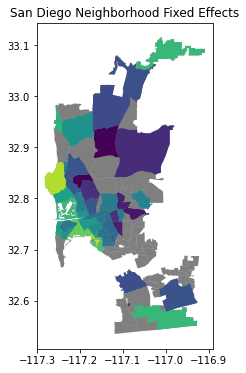

In [ ]:
ax = neighborhoods.plot(color='k', 
                        alpha=0.5,
                        figsize=(12,6))
neighborhoods.merge(neighborhood_effects, how='left',
                    left_on='neighbourhood', 
                    right_index=True)\
                  .dropna(subset=['fixed_effect'])\
                  .plot('fixed_effect',
                        ax=ax)
ax.set_title("San Diego Neighborhood Fixed Effects")
plt.show()

In [49]:
wx = db.filter(like='pg')\
        .apply(lambda y: weights.spatial_lag.lag_spatial(knn, y))\
        .rename(columns=lambda c: 'w_'+c).drop('w_pg_Apartment', axis=1)

Una vez calculado, podemos ejecutar el modelo utilizando la estimación de MCO (Mínimos Cuadrados Ordinarios) porque, en este contexto, los rezagos espaciales incluidos no violan ninguna de las suposiciones en las que se basa el MCO (son básicamente variables exógenas adicionales):


In [50]:
slx_exog = db[variable_names].join(wx)
m5 = spreg.OLS(db[['log_price']].values, 
                  slx_exog.values,
                  name_y='l_price', 
               name_x=slx_exog.columns.tolist())
print(m5.summary)

REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :        None
Dependent Variable  :     l_price                Number of Observations:        6110
Mean dependent var  :      4.9958                Number of Variables   :          15
S.D. dependent var  :      0.8072                Degrees of Freedom    :        6095
R-squared           :      0.6800
Adjusted R-squared  :      0.6792
Sum squared residual:     1273.93                F-statistic           :    924.9423
Sigma-square        :       0.209                Prob(F-statistic)     :           0
S.E. of regression  :       0.457                Log likelihood        :   -3880.030
Sigma-square ML     :       0.208                Akaike info criterion :    7790.061
S.E of regression ML:      0.4566                Schwarz criterion     :    7890.826

------------------------------------------------------------

La forma de interpretar la tabla de resultados es similar a la de cualquier otra regresión no espacial. Las variables que incluimos en la regresión original muestran un comportamiento similar, aunque con pequeños cambios en tamaño, y también pueden interpretarse de manera similar. El rezago espacial de cada tipo de propiedad (`w_pg_XXX`) es la nueva adición. Observamos que, excepto en el caso de las casas adosadas (igual que con la variable binaria, `pg_Townhouse`), todas son significativas, lo que sugiere que nuestra hipótesis inicial sobre el papel de las casas circundantes podría estar funcionando aquí.

Como ilustración, veamos algunos de los efectos directos/indirectos.
El efecto directo de la variable `pg_Condominium` significa que los condominios suelen ser un 11% más caros ($\beta_{pg\_Condominium}=0.1063$) que el tipo de propiedad de referencia, los apartamentos. Más relevante para esta sección, cualquier casa dada rodeada de condominios *también* recibe un precio premium. Pero, como $pg_Condominium$ es una variable dummy, el rezago espacial en el sitio $i$ representa el *porcentaje* de propiedades cerca de $i$ que son condominios, que está entre $0$ y $1$.
Entonces, un cambio *unitario* en esta variable significa que aumentaría el porcentaje de condominios en un 100%. Por lo tanto, un aumento de $0.1$ en `w_pg_Condominium` (un cambio de diez puntos porcentuales) resultaría en un aumento del 5.92% en el precio de la casa ($\beta_{w_pg\_Condominium} = 0.6$).
Se pueden derivar interpretaciones similares para todos los demás variables con rezago espacial para derivar el efecto *indirecto* de un cambio en el rezago espacial.

Sin embargo, para calcular el cambio indirecto para un sitio dado $i$, es posible que necesite examinar los valores predichos para $y_i$. En este ejemplo, dado que estamos utilizando una matriz de pesos estandarizada por filas con veinte vecinos más cercanos, el impacto de cambiar $x_i$ es el mismo para todos sus vecinos y para cualquier sitio $i$. Por lo tanto, el efecto siempre es $\frac{\gamma}{20}$, o aproximadamente $0.0296$. Sin embargo, esto no sería lo mismo para muchos otros tipos de pesos (como `Kernel`, `Queen`, `Rook`, `DistanceBand` o `Voronoi`), por lo que demostraremos cómo construir el efecto indirecto para un $i$ específico:

Primero, los valores predichos para $y_i$ se almacenan en el atributo `predy` de cualquier modelo:


In [ ]:
m5.predy

array([[5.43610121],
       [5.38596868],
       [4.25377454],
       ...,
       [4.29145318],
       [4.89174746],
       [4.85867698]])

Para construir nuevas predicciones, necesitamos seguir la ecuación mencionada anteriormente.

Mostrando este proceso a continuación, primero cambiemos una propiedad para que sea un condominio. Consideremos la tercera observación, que es el primer apartamento en los datos:


In [ ]:
db.loc[2]

accommodates                                                     2
bathrooms                                                 1.000000
bedrooms                                                  1.000000
beds                                                      1.000000
neighborhood                                           North Hills
pool                                                             0
d2balboa                                                  2.493893
coastal                                                          0
price                                                    99.000000
log_price                                                 4.595120
id                                                            9553
pg_Apartment                                                     1
pg_Condominium                                                   0
pg_House                                                         0
pg_Other                                                      

Este es un apartamento. Hagamos una copia de nuestros datos y cambiemos este apartamento por un condominio:


In [ ]:
db_scenario = db.copy()
db_scenario.loc[2, ['pg_Apartment', 'pg_Condominium']] = [0,1] # make Apartment 0 and condo 1

Hemos realizado el cambio con éxito:


In [ ]:
db_scenario.loc[2]

accommodates                                                     2
bathrooms                                                        1
bedrooms                                                         1
beds                                                             1
neighborhood                                           North Hills
pool                                                             0
d2balboa                                                   2.49389
coastal                                                          0
price                                                           99
log_price                                                  4.59512
id                                                            9553
pg_Apartment                                                     0
pg_Condominium                                                   1
pg_House                                                         0
pg_Other                                                      

Ahora, también necesitamos actualizar las variables de rezago espacial:


In [ ]:
wx_scenario = db_scenario.filter(like='pg')\
                         .apply(lambda y: weights.spatial_lag.lag_spatial(knn, y))\
                         .rename(columns=lambda c: 'w_'+c).drop('w_pg_Apartment', axis=1)

Y construir una nueva matriz exógena $\mathbf{X}$, incluyendo una constante 1 como la columna principal


In [ ]:
slx_exog_scenario = db_scenario[variable_names].join(wx_scenario)

Ahora, nuestra nueva predicción (en el escenario donde hemos cambiado el sitio `2` de un apartamento a un condominio) es:


In [ ]:
y_pred_scenario = m5.betas[0] + slx_exog_scenario @ m5.betas[1:]

Esta predicción será exactamente la misma para todos los sitios, excepto el sitio `2` y sus vecinos. Entonces, los *vecinos* del sitio `2` son:


In [ ]:
knn.neighbors[2]

[772,
 2212,
 139,
 4653,
 2786,
 1218,
 138,
 808,
 1480,
 4241,
 1631,
 3617,
 2612,
 1162,
 135,
 23,
 5528,
 3591,
 407,
 6088]

Y el efecto de cambiar el sitio `2` a un condominio se asocia con los siguientes cambios en $y_i$:


In [ ]:
(y_pred_scenario - m5.predy).loc[[2] + knn.neighbors[2]]

,0
2,0.106349
772,0.029642
2212,0.029642
139,0.029642
4653,0.029642
2786,0.029642
1218,0.029642
138,0.029642
808,0.029642
1480,0.029642


Vemos que la primera fila, que representa el efecto directo, es igual exactamente a la estimación para `pg_Condominium`. Sin embargo, para los otros efectos, solo hemos cambiado `w_pg_Condominium` en $0.05$.


In [ ]:
scenario_near_2 = slx_exog_scenario.loc[knn.neighbors[2], ['w_pg_Condominium']]
orig_near_2 = slx_exog.loc[knn.neighbors[2], ['w_pg_Condominium']]
scenario_near_2.join(orig_near_2, lsuffix='_scenario', rsuffix= '_original')

,w_pg_Condominium_scenario,w_pg_Condominium_original
772,0.10,0.05
2212,0.10,0.05
139,0.10,0.05
4653,0.10,0.05
2786,0.10,0.05
1218,0.10,0.05
138,0.10,0.05
808,0.05,0.00
1480,0.10,0.05
4241,0.10,0.05


Introducir un retraso espacial de una variable explicativa, como acabamos de ver, es la forma más sencilla de incorporar la noción de dependencia espacial en un marco de regresión lineal. No requiere cambios adicionales, puede estimarse con OLS y la interpretación es bastante similar a la de interpretar variables no espaciales, siempre que se requieran cambios agregados.

Sin embargo, el campo de la econometría espacial es mucho más amplio y ha producido en las últimas décadas muchas técnicas para tratar los efectos espaciales y la dependencia espacial de diferentes maneras. Aunque esto puede ser una simplificación excesiva, se puede decir que la mayoría de esos esfuerzos para el caso de una sola sección transversal se centran en dos variaciones principales: el modelo de retraso espacial y el modelo de error espacial. Ambos son similares al caso que hemos visto en que se basan en la introducción de un retraso espacial, pero difieren en el componente del modelo que modifican y afectan.

## Efectos de autocorrelación endógena con el error espacial

El modelo de error espacial incluye un retraso espacial en el término de error de la ecuación:

$$
\log{P_i} = \alpha + \sum_k \beta_k X_{ki} + u_i
$$

$$
u_i = \lambda u_{lag-i} + \epsilon_i
$$

donde $u_{lag-i} = \sum_j w_{i,j} u_j$.
Aunque parece similar, esta especificación viola las suposiciones sobre el término de error en un modelo OLS clásico. Por lo tanto, se requieren métodos de estimación alternativos. `PySAL` incorpora funcionalidad para estimar varios de los métodos más avanzados desarrollados por la literatura sobre econometría espacial. Por ejemplo, podemos usar un método general de momentos que tenga en cuenta la heterogeneidad (Arraiz et al., 2010):


In [ ]:
m6 = spreg.GM_Error_Het(db[['log_price']].values, db[variable_names].values,
                           w=knn, name_y='log_price', name_x=variable_names)
print(m6.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: SPATIALLY WEIGHTED LEAST SQUARES (HET)
---------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :   log_price                Number of Observations:        6110
Mean dependent var  :      4.9958                Number of Variables   :          11
S.D. dependent var  :      0.8072                Degrees of Freedom    :        6099
Pseudo R-squared    :      0.6655
N. of iterations    :           1                Step1c computed       :          No

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
------------------------------------------------------------------------------------
            CONSTANT       4.4262033       0.0217088     203.8898738       0.0000000
        accommodates       0.0695536       0.0063268      10.9934495       0.00

## Efectos de autocorrelación endógena entre la variable dependiente

El modelo de retraso espacial introduce un retraso espacial de la variable *dependiente*. En el ejemplo que hemos cubierto, esto se traduciría en:

$$
\log{P_i} = \alpha + \rho \log{P_{lag-i}} + \sum_k \beta_k X_{ki} + \epsilon_i
$$

Aunque puede no parecer muy diferente de la ecuación anterior, este modelo viola la suposición de exogeneidad, crucial para que funcione OLS.
En pocas palabras, esto ocurre cuando $P_i$ existe en ambos "lados" del signo igual.
En teoría, dado que $P_i$ se incluye en el cálculo de $P_{lag-i}$, se viola la exogeneidad.
Al igual que en el caso del error espacial, se han propuesto varias técnicas para superar esta limitación y `PySAL` implementa varias de ellas. En el ejemplo a continuación, utilizamos una estimación de mínimos cuadrados en dos etapas Anselin (1988), donde el retraso espacial de todas las variables explicativas se utiliza como instrumento para el retraso endógeno:


In [ ]:
m7 = spreg.GM_Lag(db[['log_price']].values, db[variable_names].values,
                     w=knn, name_y='log_price', name_x=variable_names)
print(m7.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: SPATIAL TWO STAGE LEAST SQUARES
--------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :   log_price                Number of Observations:        6110
Mean dependent var  :      4.9958                Number of Variables   :          12
S.D. dependent var  :      0.8072                Degrees of Freedom    :        6098
Pseudo R-squared    :      0.7057
Spatial Pseudo R-squared:  0.6883

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
------------------------------------------------------------------------------------
            CONSTANT       2.7440254       0.0727290      37.7294400       0.0000000
        accommodates       0.0697596       0.0048157      14.4859187       0.0000000
           bathrooms       0.1626725       0.0104007      1

## Modelos SAR en R

Para trabajar en R modelos espaciales con matrices SAR se deben utilizar las siguientes librerías

```r
library(sf) #simple features for spatial data
library(spdep)
library(spatialreg)
```

Para calcular la matriz de vecindad con vecinos mas cercanos, en este caso se debe primero obtener las coordenadas de los centroides de cada poligono del area de estudio (aoi), y finalmente transformar la matriz de vecindad a una lista:

```r
## Store the centroids of the polygons
aoi.coords = st_centroid(aoi.geom)

## Here each region is linked to its k nearest neighbors irrespective of the distance between them
sy5_nb = knn2nb(knearneigh(aoi.coords, k = 5))
aoi.listw = nb2listw(sy5_nb)
```

Para implementar cada uno de los modelos se utilizan las siguientes funciones:

```r
#Spatial Lag Model
col.fit2 = lagsarlm(y ~ x1 + x2 + x3, data = data, listw = aoi.listw)
summary(col.fit2,Nagelkerke=T)

#Spatial Error Model
col.fit3 = errorsarlm(y ~ x1 + x2 + x3, data = data, listw = aoi.listw)
summary(col.fit3,Nagelkerke=T)

#Spatial Durbin Lag Model
col.fit4 = lagsarlm(y ~ x1 + x2 + x3, data = data, listw = aoi.listw,type = "mixed")
summary(col.fit4,Nagelkerke=T)

#SLX Spatially Lagged X
col.fit5 = lmSLX(y ~ x1 + x2 + x3, data = data, listw = aoi.listw)
summary(col.fit5,Nagelkerke=T)

#Spatial Durbin Error
col.fit6 <- errorsarlm(y ~ x1 + x2 + x3, data = data, listw = aoi.listw, etype = "emixed")
summary(col.fit6,Nagelkerke=T)

#Mansky
col.fit7 <- sacsarlm(y ~ x1 + x2 + x3, data = data, listw = aoi.listw, type="sacmixed") 
summary(col.fit7,Nagelkerke=T)

#SARAR, Kelejian-Prucha, Cliff-Ord, or SAC
col.fit8 <- sacsarlm(y ~ x1 + x2 + x3, data = data, listw = aoi.listw, type="sac")
summary(col.fit8,Nagelkerke=T)
```
 